In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from lxml import html
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
pip install tabulate

Python(28576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
21842.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


let's take a look at the composition of sidney sussex students by subject (and maybe by year)

In [64]:
df_subj = pd.read_csv("sidney_subj_nums_24-5.csv")
df_subj.head()
len(df_subj)

373

In [65]:
df_subj = df_subj.rename(columns={'Subjects 2024-25 ET':"subject"})
df_subj.head()

,subject
0,"Archaeology, Part I"
1,"Archaeology, Part IIA"
2,"Archaeology, Part IIB"
3,"AMES, Part IA"
4,AMES YA - Chinese


In [58]:
df_subj[df_subj['subject'].str.contains('YA')]

,subject
4,AMES YA - Chinese
5,AMES YA- Chinese
142,HML YA - French
268,MML YA - German & Spanish
269,MML YA - Spanish
270,MML YA - Spanish


In [66]:
# separating the part/yr from the name of the course
for idx,row in df_subj.iterrows():
    if row["subject"].find(", ") >=0:
        df_subj.loc[idx,"part"] = row["subject"][row["subject"].find(", ")+2:]
    elif row["subject"].find("YA") >=0:
        df_subj.loc[idx,"part"] = "YA"
    elif row["subject"].find("NST") >=0 :
        df_subj.loc[idx,"part"] = row["subject"][row["subject"].find(" ")+1:]
    elif row["subject"].find("Foundation Year") >=0:
        df_subj.loc[idx,"part"] = "FY"
    else:
        df_subj.loc[idx,"part"] = "intermitting"

In [67]:
df_subj["part"].unique()

array(['Part I', 'Part IIA', 'Part IIB', 'Part IA', 'YA', 'Part II',
       'Part IB', 'intermitting', 'Part III', 'Part II NR', 'FY',
       'Pt IIA', 'IIA, Sociology', 'IIA, Pol Inter Re', 'IIA, SocA & Pol',
       'IIA, Pol and Soc', 'IIB, Sociology', 'IIB, Social Anth',
       'IIB, Pol Inter Re', 'Part II: Chemistry', 'Part II: Pathology',
       'Part II: Biolgcal & Biomed', 'Part II: Physics',
       'Part II: Mat Science', 'Part II: Zoology', 'Part II: Psychology',
       'Part II: Genetics', 'Part II: Biochemistry',
       'Part II: Pharmacology', 'Part II: Earth Sciences',
       'Part II: Plant Sciences', 'Part III: Physics',
       'Part III: Earth Sciences', 'Part III: HPS',
       'Part III: Astrophysics', 'Part III: Chemistry'], dtype=object)

In [59]:
for idx,row in df_subj.iterrows():
    if row["subject"].find(", ") >=0:
        df_subj.loc[idx,"subject"] = row["subject"][:row["subject"].find(", ")]
    if row["subject"].find("Tripos") >=0:
        df_subj.loc[idx,"subject"] = row["subject"][:row["subject"].find("Tripos")-1]
    if row["subject"].find("YA") >=0:
        df_subj.loc[idx,"subject"] = row["subject"][:row["subject"].find("YA")-1]
    if row["subject"].find("NST") >=0:
        df_subj.loc[idx,"subject"] = row["subject"][:row["subject"].find(" ")]
        
df_subj.head()

,subject
0,Archaeology
1,Archaeology
2,Archaeology
3,AMES
4,AMES


In [68]:
for idx,row in df_subj.iterrows():
    if row["subject"]=="Geographical":
        df_subj.loc[idx,"subject"] = "Geography"
    if row["subject"]=="Historical":
        df_subj.loc[idx,"subject"] = "History"
    if row["subject"]=="Mathematical":
        df_subj.loc[idx,"subject"] = "Math"
    if row["subject"]=="NST":
        df_subj.loc[idx,"subject"] = "Natural Sciences"
    if row["subject"]=="Economics":
        df_subj.loc[idx,"subject"] = "Econ"
    if row["subject"]=="Computer Science":
        df_subj.loc[idx,"subject"] = "Compsci"

In [69]:
for idx,row in df_subj.iterrows():
     if row["subject"]=="Natural Sciences":
        df_subj.loc[idx,"subject"] = "Natsci"

In [70]:
df_subj.head()

,subject,part
0,"Archaeology, Part I",Part I
1,"Archaeology, Part IIA",Part IIA
2,"Archaeology, Part IIB",Part IIB
3,"AMES, Part IA",Part IA
4,AMES YA - Chinese,YA


In [62]:
counts = ((df_subj["subject"]=="Natsci").value_counts()) + ((df_subj["subject"]=="Engineering").value_counts()) + ((df_subj["subject"]=="Math").value_counts()) + ((df_subj["subject"]=="History").value_counts()) + ((df_subj["subject"]=="HSPS").value_counts()) + ((df_subj["subject"]=="English").value_counts()) + ((df_subj["subject"]=="Econ").value_counts()) + ((df_subj["subject"]=="Law").value_counts()) + ((df_subj["subject"]=="Compsci").value_counts())
counts/len(df_subj)

subject
False    8.343164
True     0.656836
Name: count, dtype: float64

In [617]:
len(df_subj)

373

In [ ]:
(df_subj["subject"]=="Natsci").sum()

np.int64(73)

In [54]:
#percent of each subj out of total sidney students
def find_percent(subject):
    percent = (df_subj["subject"]==subject).sum()/len(df_subj)
    return percent

In [ ]:
print(find_percent("Natsci"))

0.19571045576407506


In [ ]:
df_subj["year"].value_counts()



year
2     122
3     108
1     107
4      18
YA     13
FY      5
Name: count, dtype: int64

In [71]:
for idx, row in df_subj.iterrows():
    if row["part"].find("III") >=0:
        df_subj.loc[idx,"year"] = "4"
    elif row["part"].find("IIA") >=0 and row["subject"].find("Engineering") < 0:
        df_subj.loc[idx,"year"] = "2"
    elif row["part"].find("IIA") >=0 and row["subject"].find("Engineering") >= 0:
        df_subj.loc[idx,"year"] = "3"
    elif row["part"].find("II") >=0 and row["subject"].find("Engineering") < 0:
        df_subj.loc[idx,"year"] = "3"
    elif row["part"].find("IIB") >=0 and row["subject"].find("Engineering") >= 0:
        df_subj.loc[idx,"year"] = "4"
    elif row["part"].find("IB") >=0:
        df_subj.loc[idx,"year"] = "2"
    elif row["part"].find("I") >=0:
        df_subj.loc[idx,"year"] = "1"
    elif row["part"].find("FY") >=0:
        df_subj.loc[idx,"year"] = "FY"
    elif row["part"].find("intermitting") >=0:
        df_subj.loc[idx,"year"] = "intermitting"
    else:
        df_subj.loc[idx,"year"] = "YA"

In [9]:
humanities = ['Archaeology', 'AMES', 'Architecture', 'Classics',
       'Economics', 'English',
       'Foundation Year', 'Geography', 'History of Art', 'HML',
       'Hist & Pol', 'HSPS', 'History', 'Land Economy', 'Linguistics',
       'Law',
       'Management Studies', 'MML', 'Music', 'PBS',
       'Philosophy', 'Theology']

stem = ['Chem Eng',
       'Computer Science','Engineering', 'Maths', 'Med Sciences', 'Manufact Engineering',
       'Natural Sciences','Vet Sciences']

In [10]:
for idx,row in df_subj.iterrows():
    if row["subject"] in humanities:
        df_subj.loc[idx,"subject_type"] = "humanities"
    else:
        df_subj.loc[idx,"subject_type"] = "stem"

In [599]:
(df_subj["subject"].unique()).size

30

([<matplotlib.patches.Wedge at 0x13b480730>,
 [Text(1.0996488730640137, 0.027791293043772588, 'Archaeology'),
  Text(1.095282417535526, 0.1017665261150922, 'AMES'),
  Text(1.0794248999016944, 0.21175902689665227, 'Architecture'),
  Text(1.0470177174373139, 0.33727421984545064, 'Chem Eng'),
  Text(0.9881765301240155, 0.4832257705380176, 'Classics'),
  Text(0.876668111166475, 0.6644193125307281, 'Compsci'),
  Text(0.6827299557453076, 0.8624846708945096, 'Econ'),
  Text(0.20721127786189675, 1.08030712592616, 'Engineering'),
  Text(-0.3328619753204835, 1.0484287793578284, 'English'),
  Text(-0.5365739163052198, 0.9602543581472979, 'Foundation Year'),
  Text(-0.6607216043638663, 0.8794583341619083, 'Geography'),
  Text(-0.7595949138202144, 0.7956227541356905, 'History of Art'),
  Text(-0.8114395536912139, 0.7426747947152939, 'HML'),
  Text(-0.8653521481594505, 0.6790917903169089, 'Hist & Pol'),
  Text(-0.9840716054671561, 0.4915313574059077, 'HSPS'),
  Text(-1.0923616768579716, 0.1294062090

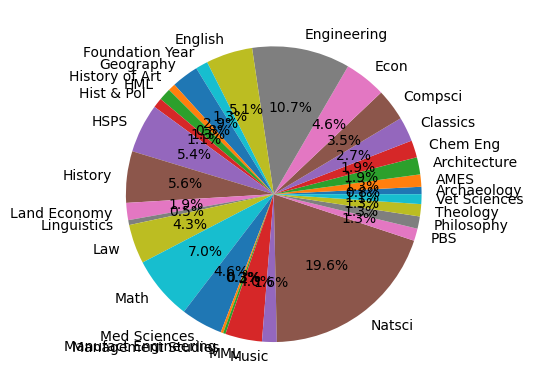

In [ ]:
#plot the composition of courses as a pie chart
labels = df_subj["subject"].unique()

sizes = []

for label in labels:
    subj_count = len(df_subj.loc[df_subj["subject"]==label])
    sizes.append(subj_count)

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

Text(0, 0.5, '# of students')

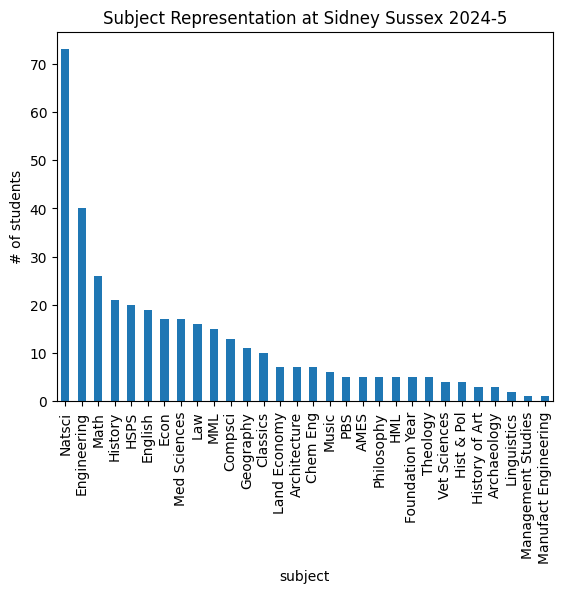

In [605]:
df_subj["subject"].value_counts().plot.bar(title="Subject Representation at Sidney Sussex 2024-5")
plt.ylabel('# of students')

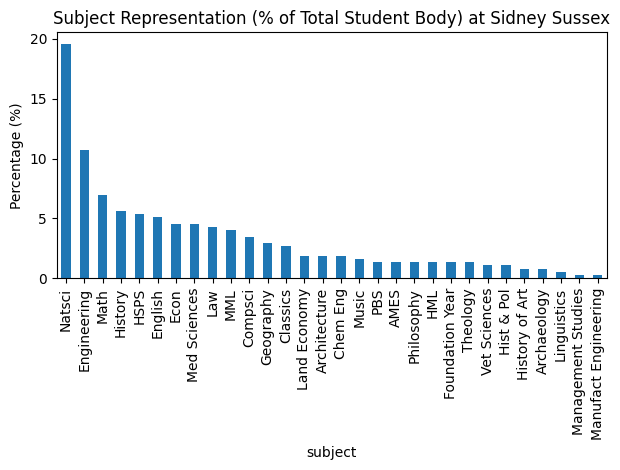

In [608]:
percentages = df_subj['subject'].value_counts(normalize=True) * 100
percentages.plot(kind='bar')

plt.ylabel('Percentage (%)')
plt.title('Subject Representation (% of Total Student Body) at Sidney Sussex')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


([<matplotlib.patches.Wedge at 0x1399ba590>,
 [Text(-0.050937848463733525, 1.09881997415131, 'humanities'),
  Text(0.0509379445256302, -1.0988199696981775, 'stem')],
 [Text(-0.027784280980218286, 0.5993563495370782, '51.5%'),
  Text(0.027784333377616467, -0.5993563471080968, '48.5%')])

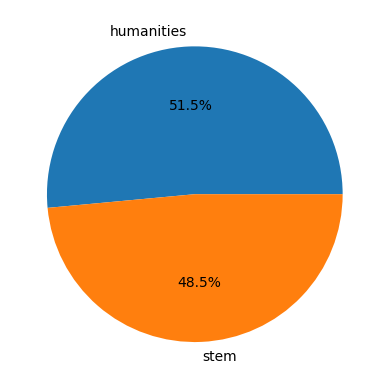

In [194]:
labels = df_subj["subject_type"].unique()

sizes = []

for label in labels:
    subj_count = len(df_subj.loc[df_subj["subject_type"]==label])
    sizes.append(subj_count)

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x11b8e7310>,
 [Text(0.6532909469565222, 0.884992055684485, '2'),
  Text(-1.035063049525587, 0.37234994763903556, '3'),
  Text(-0.09715297258523416, -1.0957012822470606, '1'),
  Text(0.948744456805357, -0.5566722156539772, '4'),
  Text(1.0673503262641288, -0.26601368578300255, 'intermitting'),
  Text(1.0900270754276182, -0.1477869237609126, 'YA'),
  Text(1.0990247547062342, -0.04630970247045421, 'FY')],
 [Text(0.35634051652173937, 0.4827229394642645, '29.8%'),
  Text(-0.5645798451957746, 0.20309997143947392, '29.5%'),
  Text(-0.052992530501036805, -0.597655244862033, '28.7%'),
  Text(0.5174969764392856, -0.3036393903567148, '7.2%'),
  Text(0.5821910870531611, -0.1450983740634559, '1.9%'),
  Text(0.5945602229605189, -0.08061104932413413, '1.6%'),
  Text(0.5994680480215822, -0.02525983771115684, '1.3%')])

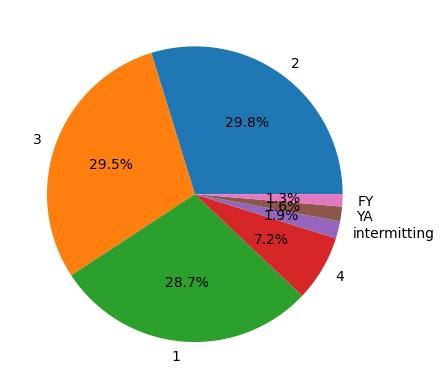

In [11]:
labels = df_subj["year"].value_counts().keys()

sizes = list(df_subj["year"].value_counts())


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')



In [17]:
#look at the acceptance nums for next yr
df_acceptance_nums = pd.read_csv("sidney_sussex_course_acceptance_rate.csv")
df_acceptance_nums.sort_values(by="acceptance")

,course,acceptance
1,Archaeology,1.0
15,History of Art,1.0
7,Design,1.0
0,"Anglo-Saxon, Norse, and Celtic",1.5
25,Philosophy,1.5
3,AMES,1.5
19,Linguistics,1.5
27,Theology,1.5
13,Hist & Mod Lang,1.5
14,Hist & Pol,2.0


In [574]:
labels = df_acceptance_nums["course"]

sizes = df_acceptance_nums["acceptance"]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

NameError: name 'df_acceptance_nums' is not defined

we will practice measuring time gaps with HSPS part I and Law part IA lecture overlaps

In [ ]:
df = pd.read_csv("lectures_hspslaw.csv")
df.loc[df["course"]=="HSPS"].head(10)

,course,module,date,week_day,start_time,end_time,part/paper
145,HSPS,POL1: The Modern State and its Alternatives,10-10-2024,Thu,10:00,11:00,Part I
146,HSPS,SOC1: Introduction to Sociology: Modern Societ...,10-10-2024,Thu,11:00,13:00,Part I
147,HSPS,SAN1: How Anthropologists Think,11-10-2024,Fri,11:00,12:00,Part I
148,HSPS,"POL2: International Conflict, Order and Justice",14-10-2024,Mon,10:00,11:00,Part I
149,HSPS,POL1: The Modern State and its Alternatives,15-10-2024,Tue,10:00,11:00,Part I
150,HSPS,SAN1: Critical Issues: Political and Economic ...,15-10-2024,Tue,11:00,12:00,Part I
151,HSPS,"POL2: International Conflict, Order and Justice",16-10-2024,Wed,10:00,11:00,Part I
152,HSPS,POL1: The Modern State and its Alternatives,17-10-2024,Thu,10:00,11:00,Part I
153,HSPS,SOC1: Introduction to Sociology: Modern Societ...,17-10-2024,Thu,11:00,13:00,Part I
154,HSPS,SAN1: How Anthropologists Think,18-10-2024,Fri,11:00,12:00,Part I


In [3]:
#first yr time tables merged
df = pd.read_csv("lectures_natsci_yr1.csv")
df1 = pd.read_csv("lectures_math_yr1.csv")
df2 = pd.read_csv("lectures_history_yr1.csv")
df3 = pd.read_csv("lectures_hsps_english_econ_law_yr1.csv")
df4 = pd.read_csv("lectures_compsci_yr1.csv")
df5 = pd.read_csv("lectures_engineering_yr1.csv")
df6 = pd.read_csv("lectures_mml_yr1.csv")
# len(df1)
df = pd.concat([df, df1, df2, df3, df4, df5, df6], ignore_index=True)
len(df)
# df.to_csv("lectures_merged_yr1.csv")

4363

In [625]:
# first yr natsci only
df = pd.read_csv("lectures_natsci_yr1.csv")

In [437]:
# first yr STEM
df = pd.read_csv("lectures_natsci_yr1.csv")
df1 = pd.read_csv("lectures_math_yr1.csv")
df4 = pd.read_csv("lectures_compsci_yr1.csv")
df5 = pd.read_csv("lectures_engineering_yr1.csv")

df = pd.concat([df, df1, df4, df5], ignore_index=True)

In [699]:
# first yr humanities/social science
df2 = pd.read_csv("lectures_history_yr1.csv")
df3 = pd.read_csv("lectures_hsps_english_econ_law_yr1.csv")
df6 = pd.read_csv("lectures_mml_yr1.csv")

# len(df1)
df = pd.concat([df2, df3, df6], ignore_index=True)

In [719]:
# second yr time tables merged

df = pd.read_csv("lectures_natsci_yr2.csv")
df1 = pd.read_csv("lectures_math_yr2.csv")
df2 = pd.read_csv("lectures_history_yr2.csv")
df3 = pd.read_csv("lectures_hsps_english_econ_law_yr2.csv")
df4 = pd.read_csv("lectures_compsci_yr2.csv")
df5 = pd.read_csv("lectures_engineering_yr2.csv")
df6 = pd.read_csv("lectures_mml_yr2.csv")
len(df)
# len(df1)
df = pd.concat([df, df1, df2, df3, df4, df5, df6], ignore_index=True)
len(df)

7139

In [518]:
# second yr STEM
df = pd.read_csv("lectures_natsci_yr2.csv")
df1 = pd.read_csv("lectures_math_yr2.csv")
df4 = pd.read_csv("lectures_compsci_yr2.csv")
df5 = pd.read_csv("lectures_engineering_yr2.csv")

df = pd.concat([df, df1, df4, df5], ignore_index=True)

In [500]:
# second yr natsci

df = pd.read_csv("lectures_natsci_yr2.csv")

In [734]:
# second yr humanities/social science
df2 = pd.read_csv("lectures_history_yr2.csv")
df3 = pd.read_csv("lectures_hsps_english_econ_law_yr2.csv")
df6 = pd.read_csv("lectures_mml_yr2.csv")
# len(df1)
df = pd.concat([df2, df3, df6], ignore_index=True)

In [618]:
# third yr time tables merged

df = pd.read_csv("lectures_natsci_yr3.csv")
df1 = pd.read_csv("lectures_math_yr3.csv")
df2 = pd.read_csv("lectures_history_yr3.csv")
df3 = pd.read_csv("lectures_hsps_english_econ_law_yr3.csv")
df4 = pd.read_csv("lectures_compsci_yr3.csv")
df5 = pd.read_csv("lectures_engineering_yr3.csv")
len(df)
# len(df1)
df = pd.concat([df, df1, df2, df3, df4, df5], ignore_index=True)
len(df)

8299

In [493]:
# third yr natsci

df = pd.read_csv("lectures_natsci_yr3.csv")

In [529]:
# third yr STEM
df = pd.read_csv("lectures_natsci_yr3.csv")
df1 = pd.read_csv("lectures_math_yr3.csv")
df4 = pd.read_csv("lectures_compsci_yr3.csv")
df5 = pd.read_csv("lectures_engineering_yr3.csv")

df = pd.concat([df, df1, df4, df5], ignore_index=True)

In [535]:
# third yr humanities/social science
df2 = pd.read_csv("lectures_history_yr3.csv")
df3 = pd.read_csv("lectures_hsps_english_econ_law_yr3.csv")

# len(df1)
df = pd.concat([df2, df3], ignore_index=True)

In [678]:
# fourth yr timetables
df = pd.read_csv("lectures_natsci_yr4.csv")
df1 = pd.read_csv("lectures_mml_yr4.csv")
df2 = pd.read_csv("lectures_engineering_yr4.csv")
len(df)
# len(df1)
df = pd.concat([df, df1, df2], ignore_index=True)
len(df)

4674

In [651]:
# fourth yr natsci

df = pd.read_csv("lectures_natsci_yr4.csv")

In [662]:
# fourth yr engi

df = pd.read_csv("lectures_engineering_yr4.csv")

In [668]:
# fourth yr engi

df = pd.read_csv("lectures_mml_yr4.csv")

In [40]:
#first yr time tables merged
df = pd.read_csv("lectures_natsci_yr1.csv")
df1 = pd.read_csv("lectures_math_yr1.csv")
df2 = pd.read_csv("lectures_history_yr1.csv")
df3 = pd.read_csv("lectures_hsps_english_econ_law_yr1.csv")
df4 = pd.read_csv("lectures_compsci_yr1.csv")
df5 = pd.read_csv("lectures_engineering_yr1.csv")
df6 = pd.read_csv("lectures_mml_yr1.csv")
# len(df1)
df_all = pd.concat([df, df1, df2, df3, df4, df5, df6], ignore_index=True)
len(df_all)

4363

In [41]:
df = pd.read_csv("lectures_natsci_yr2.csv")
df1 = pd.read_csv("lectures_math_yr2.csv")
df2 = pd.read_csv("lectures_history_yr2.csv")
df3 = pd.read_csv("lectures_hsps_english_econ_law_yr2.csv")
df4 = pd.read_csv("lectures_compsci_yr2.csv")
df5 = pd.read_csv("lectures_engineering_yr2.csv")
df6 = pd.read_csv("lectures_mml_yr2.csv")
# len(df1)
df_all2 = pd.concat([df, df1, df2, df3, df4, df5, df6], ignore_index=True)
df_all = pd.concat([df_all, df_all2],ignore_index=True)
len(df_all)

11502

In [42]:
df = pd.read_csv("lectures_natsci_yr3.csv")
df1 = pd.read_csv("lectures_math_yr3.csv")
df2 = pd.read_csv("lectures_history_yr3.csv")
df3 = pd.read_csv("lectures_hsps_english_econ_law_yr3.csv")
df4 = pd.read_csv("lectures_compsci_yr3.csv")
df5 = pd.read_csv("lectures_engineering_yr3.csv")
# len(df1)
df_all3 = pd.concat([df, df1, df2, df3, df4, df5], ignore_index=True)
df_all = pd.concat([df_all, df_all3],ignore_index=True)
len(df_all)

19801

In [43]:
df = pd.read_csv("lectures_natsci_yr4.csv")
df1 = pd.read_csv("lectures_mml_yr4.csv")
df2 = pd.read_csv("lectures_engineering_yr4.csv")
# len(df1)
df_all4 = pd.concat([df, df1, df2], ignore_index=True)
df_all = pd.concat([df_all, df_all4],ignore_index=True)

len(df_all)

24475

In [44]:
df = df_all
len(df)

24475

In [5]:
len(df)

4674

In [649]:
df.head(5)

,course,module,date,week_day,start_time,end_time,part,year
0,NST,Advanced R Course,2024-10-10,Thu,09:00:00,12:00:00,III,4
1,NST,M20,2024-10-10,Thu,09:00:00,10:00:00,III,4
2,NST,O22 Lectures,2024-10-10,Thu,09:00:00,11:00:00,III,4
3,NST,M1: Inorganic materials,2024-10-10,Thu,09:00:00,10:00:00,III,4
4,NST,TQM,2024-10-10,Thu,09:30:00,11:00:00,III,4


In [45]:
for iter, row in df.iterrows():
    if row["start_time"].find("9") > 0 and len(row["start_time"]) > 4:
        df.loc[iter,"start_time"] = row["start_time"][1:]

In [231]:
df['date'].unique()

array(['10-10-2024', '11-10-2024', '12-10-2024', '14-10-2024',
       '15-10-2024', '16-10-2024', '17-10-2024', '18-10-2024',
       '19-10-2024', '21-10-2024', '22-10-2024', '23-10-2024',
       '24-10-2024', '25-10-2024', '26-10-2024', '28-10-2024',
       '29-10-2024', '30-10-2024', '31-10-2024', '01-11-2024',
       '02-11-2024', '04-11-2024', '05-11-2024', '06-11-2024',
       '07-11-2024', '08-11-2024', '09-11-2024', '11-11-2024',
       '12-11-2024', '13-11-2024', '14-11-2024', '15-11-2024',
       '16-11-2024', '18-11-2024', '19-11-2024', '20-11-2024',
       '21-11-2024', '22-11-2024', '23-11-2024', '25-11-2024',
       '26-11-2024', '27-11-2024', '28-11-2024', '29-11-2024',
       '30-11-2024', '02-12-2024', '03-12-2024', '04-12-2024',
       '23-01-2025', '24-01-2025', '25-01-2025', '27-01-2025',
       '28-01-2025', '29-01-2025', '30-01-2025', '31-01-2025',
       '01-02-2025', '03-02-2025', '04-02-2025', '05-02-2025',
       '06-02-2025', '07-02-2025', '08-02-2025', '10-02

In [650]:
df[df['date']== "2025-05-04"]

,course,module,date,week_day,start_time,end_time,part,year
1668,NST,Paper 3 - Mathmatical modelling and analysis o...,2025-05-04,Sun,07:00:00,19:00:00,III,4
1669,NST,Paper 1- Integrative essays - ** TBC**,2025-05-04,Sun,07:00:00,19:00:00,III,4
1670,NST,Paper 2 - Data acquisition and handling ** TBC**,2025-05-04,Sun,07:00:00,19:00:00,III,4
1671,NST,Paper 4 - Data handling problem and outline gr...,2025-05-04,Sun,07:00:00,19:00:00,III,4


In [ ]:
# df = pd.read_csv("lectures_natsci_yr2_complete.csv")

In [233]:
# df[df["start_time"].str=="9:00"]
df["start_time"].unique()

array(['9:00', '10:00', '11:00', '13:45', '14:00', '15:30', '12:00',
       '13:30', '17:00', '15:15', '15:00', '13:00', '12:30', '16:00',
       '9:50', '10:10'], dtype=object)

In [46]:
from datetime import datetime
import csv

In [47]:
def time_to_minutes(t):
    return t.hour * 60 + t.minute

In [7]:
# list_with_a = [row for row in df if df.iloc[[row,4]].find("a") != -1]

mask = df.iloc[:, 4].astype(str).str.contains("a")

list_with_a = df[mask]
print(list_with_a)

Empty DataFrame
Columns: [course, module, date, week_day, start_time, end_time, part, year]
Index: []


In [ ]:
# for iter, row in df.iterrows():
#     df.loc[iter,"start_time"] = row["start_time"].rsplit(":", 1)[0]
#     df.loc[iter,"end_time"] = row["end_time"].rsplit(":", 1)[0]
# df["start_time"] = df["start_time"].rsplit(":", 1)[0]  # removes the ":SS" suffix
# start = datetime.strptime(t_clean, "%H:%M").time()

In [109]:
lectures_by_date = {}

file = 'lectures_merged_yr1.csv'

with open(file) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['date']
        start = datetime.strptime(row['start_time'], "%H:%M").time()
        end = datetime.strptime(row['end_time'], "%H:%M").time()
        if date not in lectures_by_date:
            lectures_by_date[date] = []
        lectures_by_date[date].append((time_to_minutes(start), time_to_minutes(end)))

ValueError: unconverted data remains: :00

In [71]:
len(lectures_by_date)
print(lectures_by_date.items())

dict_items([('10-10-2024', [(540, 600), (540, 600), (600, 660), (660, 1020), (660, 720), (825, 915), (840, 1065), (930, 1020), (600, 660), (660, 720), (720, 780), (540, 600), (720, 780), (600, 660), (660, 780), (540, 600), (540, 600), (660, 720), (600, 840)]), ('11-10-2024', [(540, 600), (660, 1020), (660, 720), (720, 780), (825, 915), (840, 1065), (930, 1020), (600, 660), (660, 720), (600, 660), (600, 660), (600, 660), (660, 720), (720, 780), (660, 720), (540, 600), (660, 720), (540, 600), (660, 720), (540, 600), (600, 660)]), ('12-10-2024', [(540, 600), (540, 600), (600, 660), (600, 660), (660, 720), (600, 660), (660, 720)]), ('14-10-2024', [(540, 600), (540, 600), (600, 660), (660, 1020), (660, 720), (660, 720), (720, 780), (810, 1050), (825, 915), (840, 1065), (930, 1020), (600, 660), (660, 720), (660, 720), (720, 780), (600, 660), (540, 600), (540, 600), (660, 720), (720, 780), (600, 660), (660, 720), (720, 780)]), ('15-10-2024', [(540, 600), (540, 600), (600, 660), (600, 660), (6

In [48]:
# Load your data
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['start_time'] = pd.to_datetime(df['start_time']).dt.time
df['end_time'] = pd.to_datetime(df['end_time']).dt.time

/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/1181542175.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_time'] = pd.to_datetime(df['start_time']).dt.time
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/1181542175.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['end_time'] = pd.to_datetime(df['end_time']).dt.time


In [51]:
# Select one week (you can adjust these dates)
start_week = pd.to_datetime('2024-10-10')  # Thursday, yyyy-mm-dd
end_week = start_week + pd.Timedelta(days=6)

df_week = df[(df['date'] >= start_week) & (df['date'] <= end_week)]

# # Create time intervals (every 15 min from 11:00 to 18:00)
# time_start = pd.to_datetime('8:00', format='%H:%M')
# time_end = pd.to_datetime('20:00', format='%H:%M')
# time_bins = pd.date_range(time_start, time_end, freq='15min')

# # Prepare empty matrix
# days = ['Thursday', 'Friday', 'Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', ]
# heatmap_data = pd.DataFrame(0, index=[t.strftime('%H:%M') for t in time_bins[:-1]], columns=days)
# heatmap_data.head()

In [52]:
# Helper to convert time to index in time_bins
def time_to_index(t):
    # Convert a datetime.time to the nearest interval index
    t_dt = pd.to_datetime(t.strftime('%H:%M'), format='%H:%M')
    idx = time_bins.get_indexer([t_dt], method='pad')[0]
    return idx

In [74]:
# Fill heatmap matrix
for idx,row in df_week.iterrows():
    day_name = row['date'].strftime('%A')
    if day_name not in heatmap_data.columns:
        continue  # skip if outside Monday-Sunday
    start_idx = time_to_index(row['start_time'])
    end_idx = time_to_index(row['end_time'])

    # Increment all intervals covered by the lecture
    for i in range(start_idx, min(end_idx, len(heatmap_data))):
        heatmap_data.at[heatmap_data.index[i], day_name] += 1
# print(heatmap_data)

In [16]:
heatmap_data.head(20)

,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday
08:00,0,0,0,0,0,0,0
08:15,0,0,0,0,0,0,0
08:30,0,0,0,0,0,0,0
08:45,0,0,0,0,0,0,0
09:00,0,1,0,0,0,0,0
09:15,0,1,0,0,0,0,0
09:30,0,1,0,0,0,0,0
09:45,0,1,0,0,0,0,0
10:00,2,1,0,0,2,2,2
10:15,2,1,0,0,2,2,2


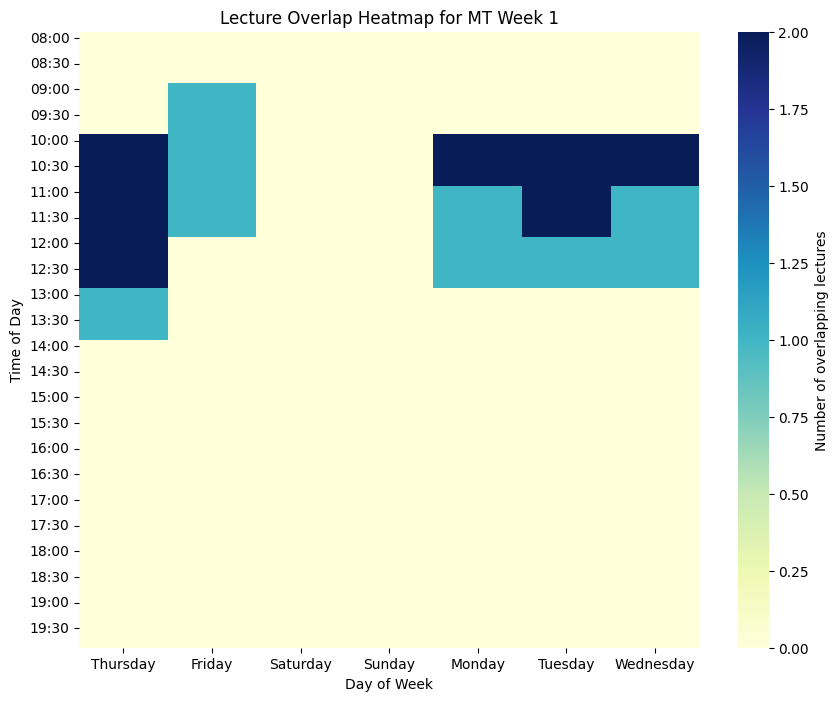

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Number of overlapping lectures'})
plt.title('Lecture Overlap Heatmap for MT Week 1')
plt.xlabel('Day of Week')
plt.ylabel('Time of Day')
# plt.tight_layout()
plt.show()

i want to add functionalities to this -- diff colors for each subject, transparency?

In [49]:
# Convert times to fractional hours
def time_to_hours(t):
    return t.hour + t.minute / 60

In [50]:
mich_term = ['2024-10-10','2024-10-17','2024-10-24','2024-10-31','2024-11-07','2024-11-14','2024-11-21','2024-11-28']
lent_term = ["2025-01-23","2025-01-30","2025-02-06","2025-02-13","2025-02-20","2025-02-27","2025-03-06","2025-03-13"]
east_term = ["2025-05-01","2025-05-08","2025-05-15","2025-05-22","2025-05-29","2025-06-05","2025-06-12","2025-06-17"]

In [581]:
df.head()

,course,module,date,week_day,start_time,end_time,part,year
0,Natsci,Mathematical Methods I,2024-10-10,Thu,09:00:00,10:00:00,IA,1
1,Natsci,Mathematical Methods I,2024-10-10,Thu,09:00:00,10:00:00,IA,1
2,Natsci,Dynamics,2024-10-10,Thu,10:00:00,11:00:00,IA,1
3,Natsci,Practical - odd Thursdays,2024-10-10,Thu,11:00:00,17:00:00,IA,1
4,Natsci,Introduction to evolutionary biology,2024-10-10,Thu,11:00:00,12:00:00,IA,1


/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:9: SettingWithCopyWarning: 
A value is trying

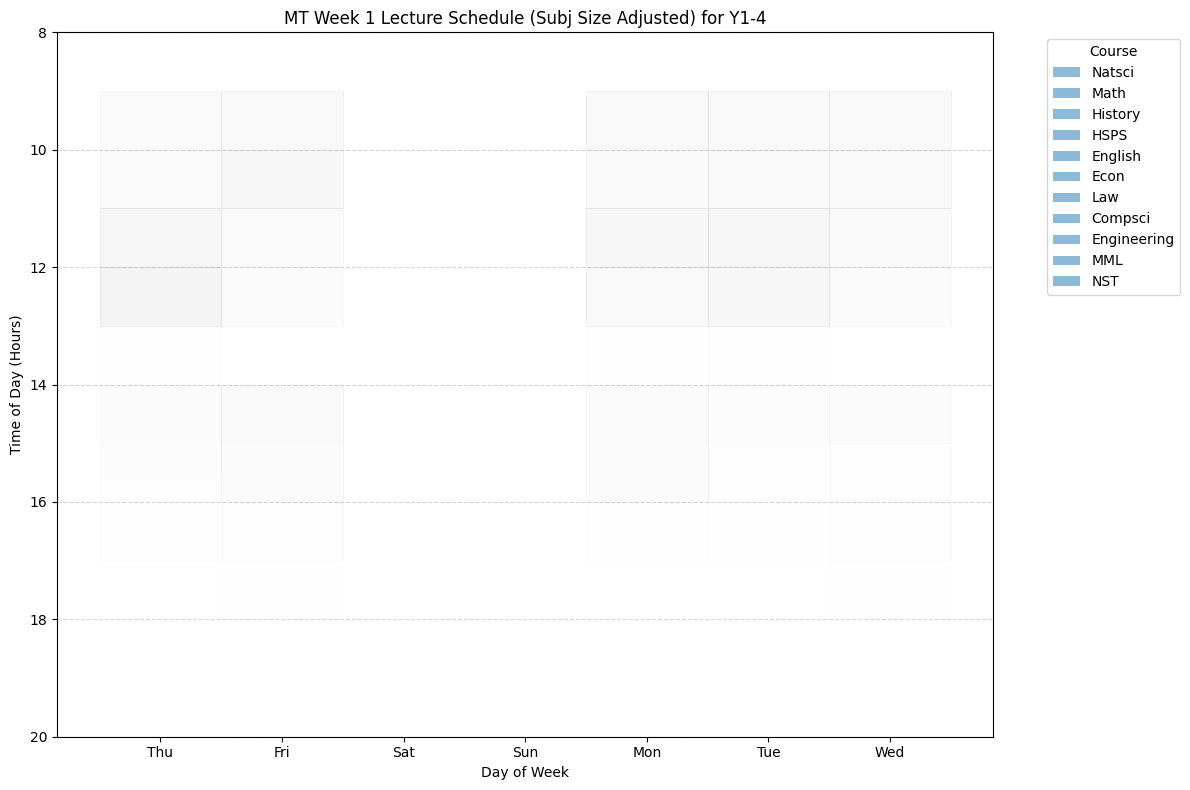

/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:9: SettingWithCopyWarning: 
A value is trying

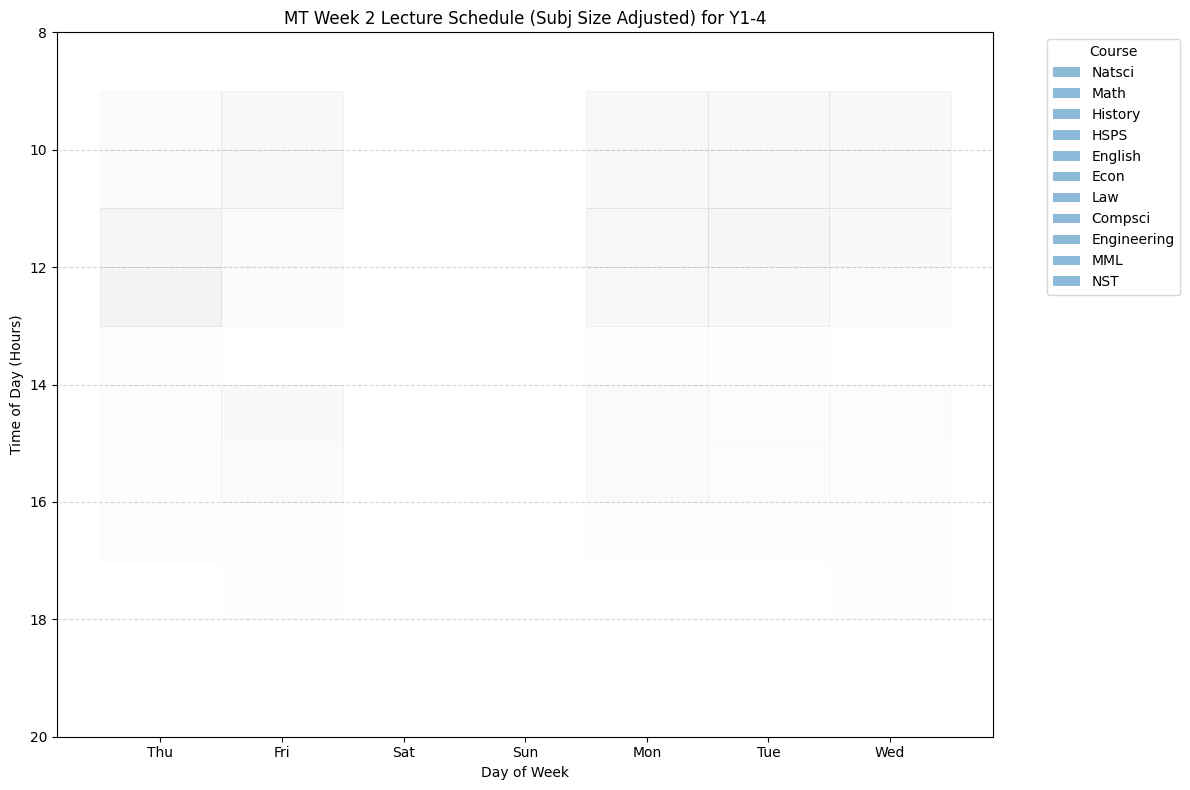

/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:9: SettingWithCopyWarning: 
A value is trying

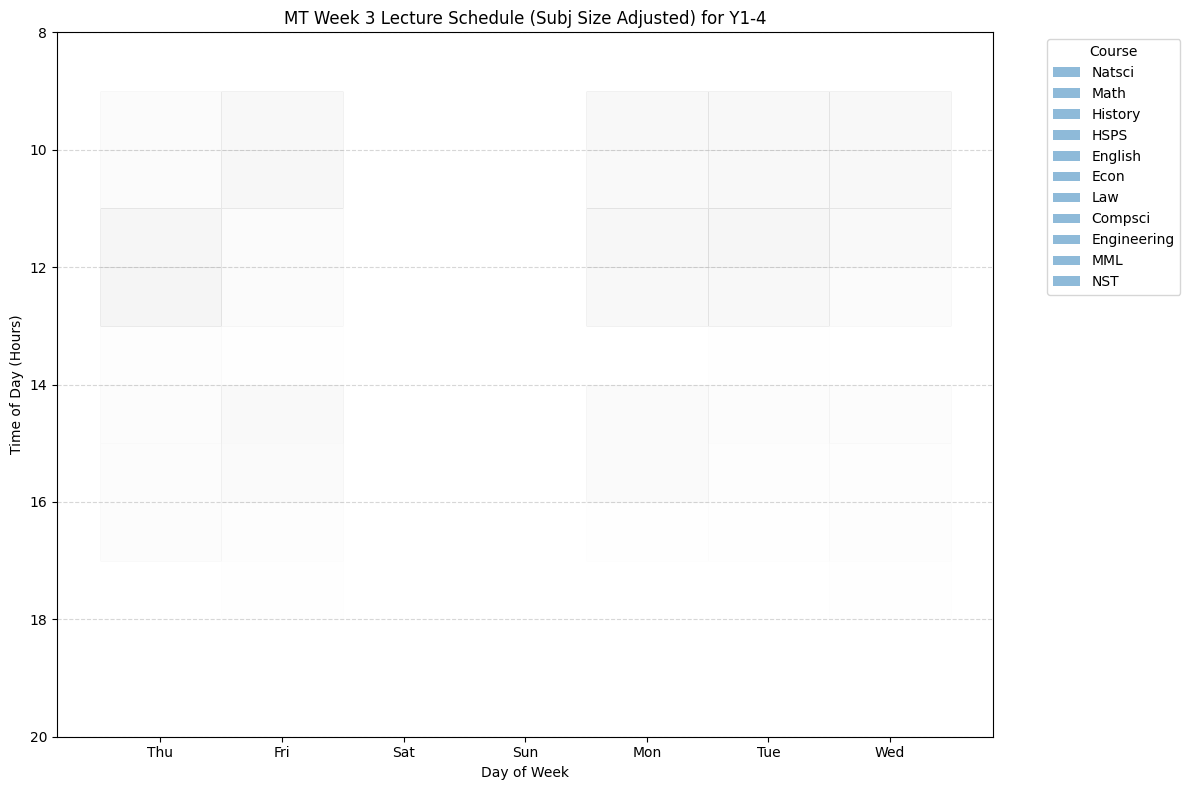

/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:9: SettingWithCopyWarning: 
A value is trying

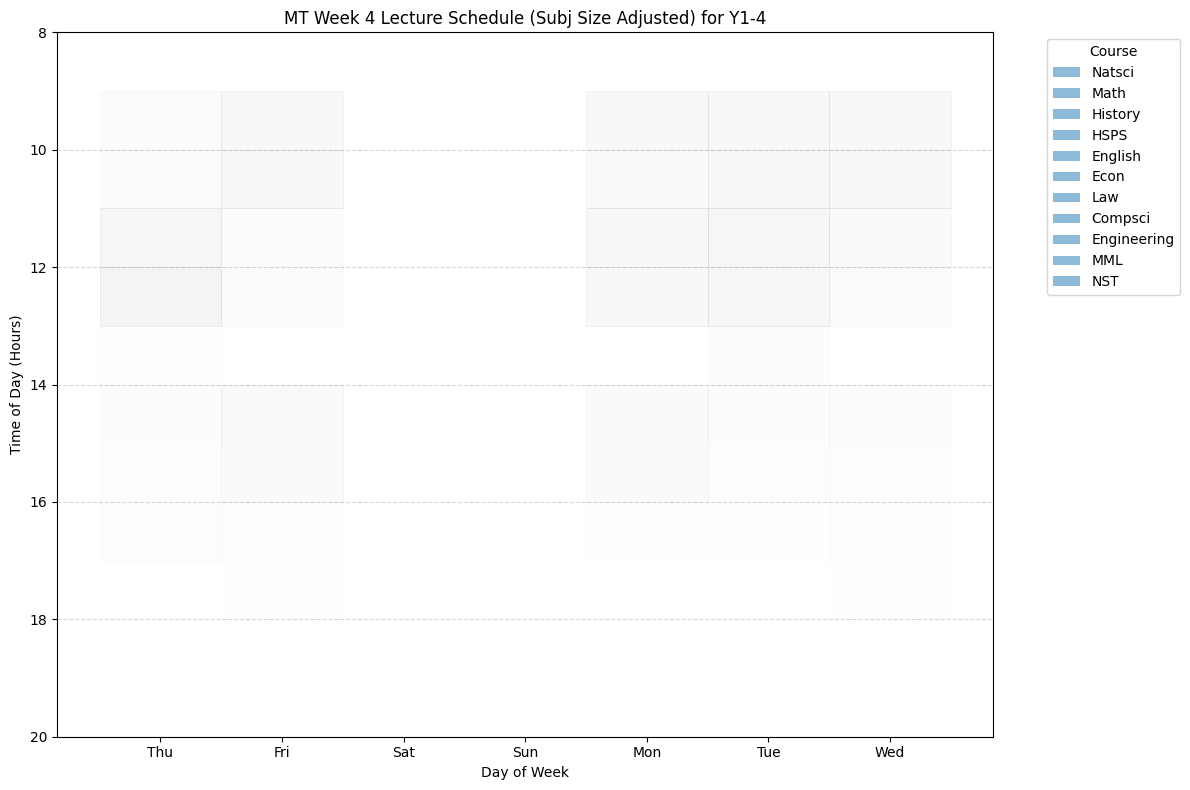

/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:9: SettingWithCopyWarning: 
A value is trying

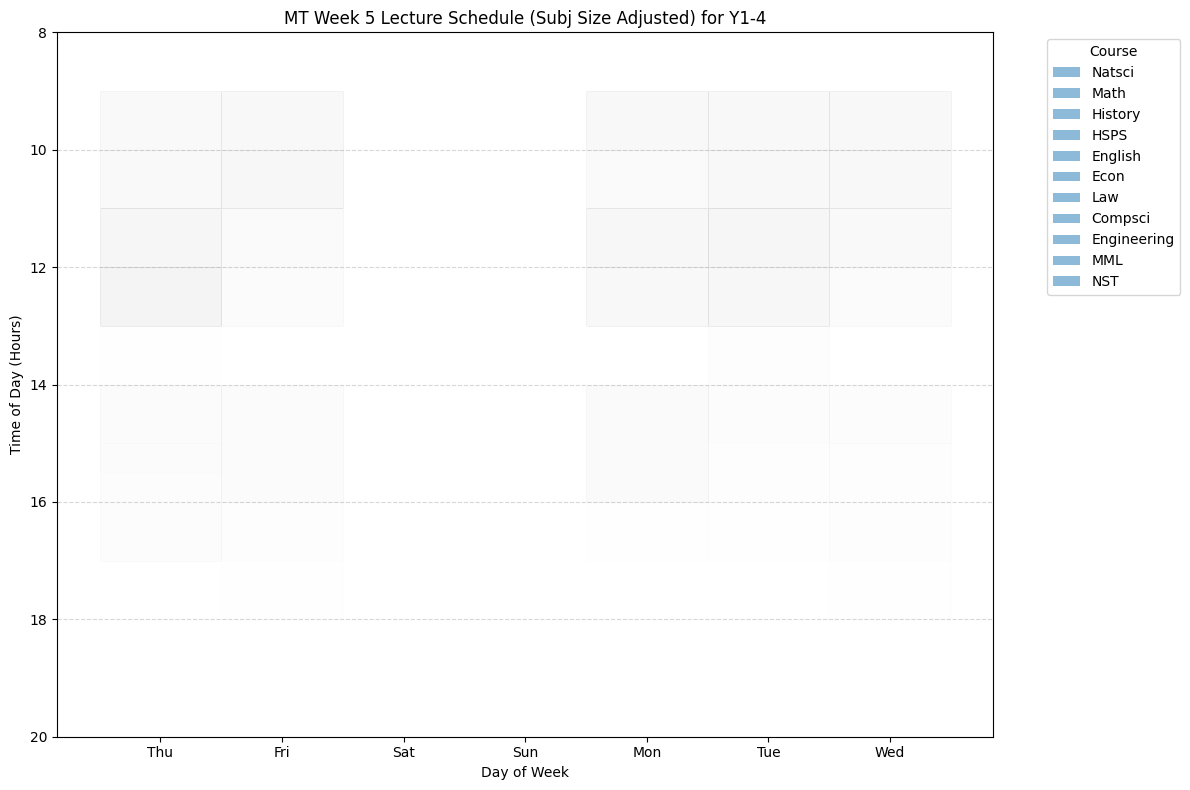

/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:9: SettingWithCopyWarning: 
A value is trying

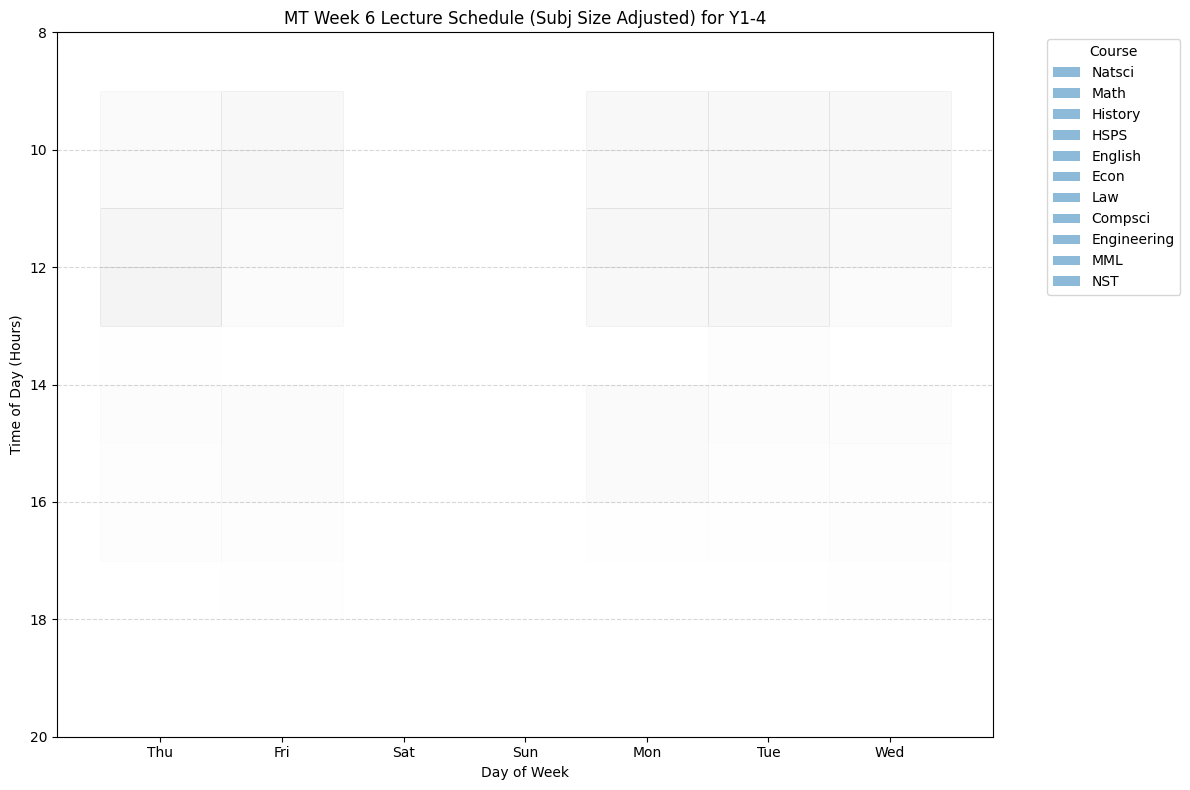

/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:9: SettingWithCopyWarning: 
A value is trying

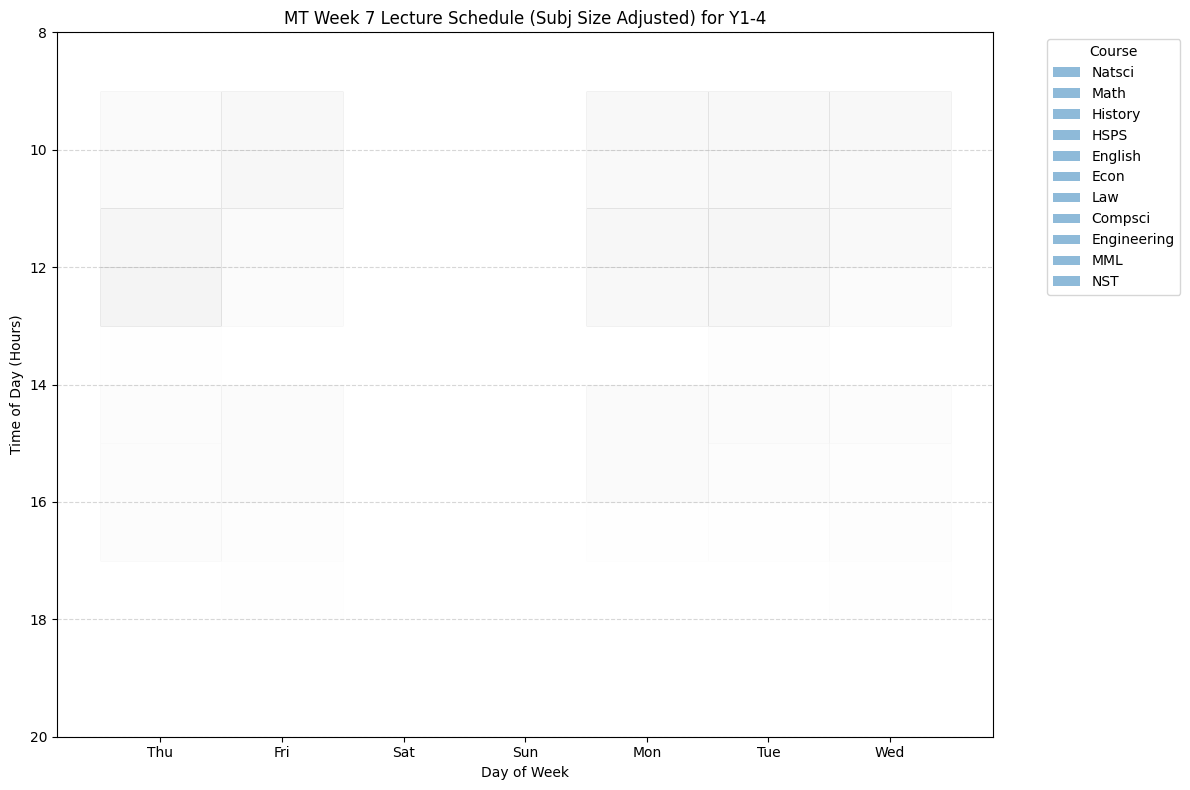

/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_76050/3382987649.py:9: SettingWithCopyWarning: 
A value is trying

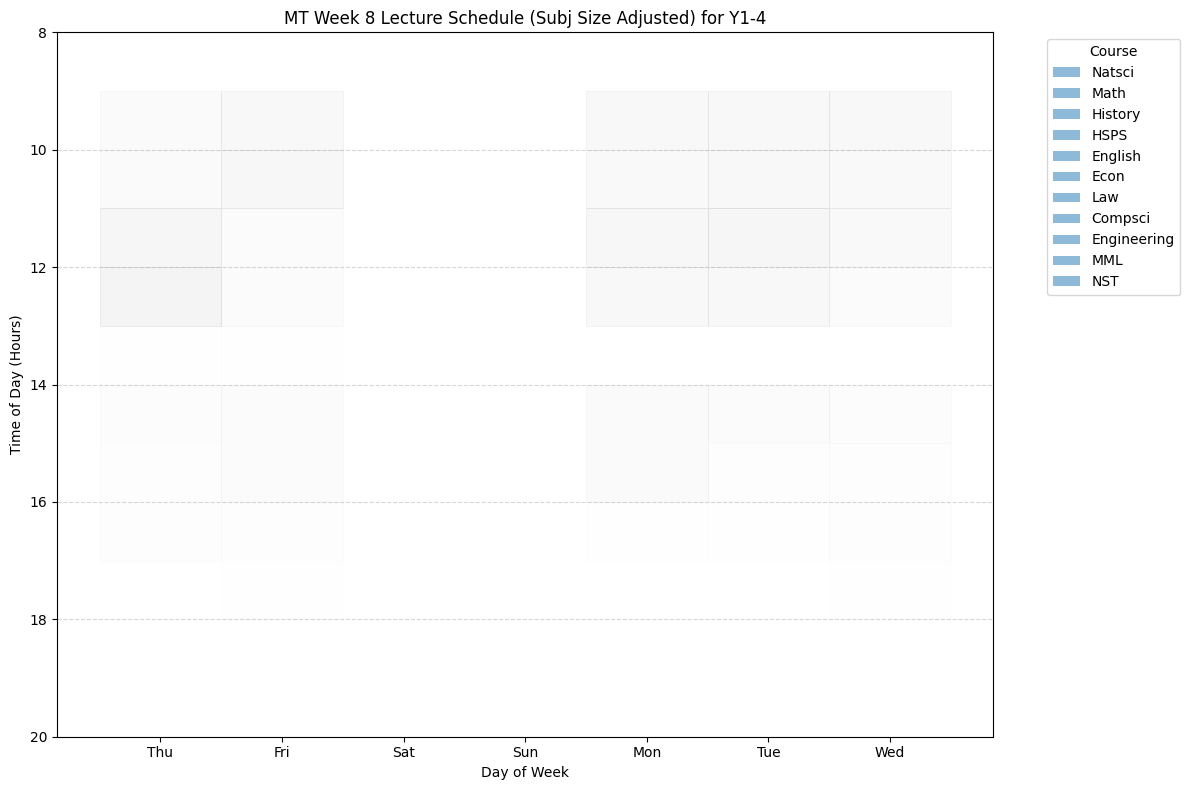

In [ ]:
# Select one week (you can adjust these dates)

for i in range(0,8):
    start_week = pd.to_datetime(mich_term[i])  # Thursday
    end_week = start_week + pd.Timedelta(days=6)
    df_week = df[(df['date'] >= start_week) & (df['date'] <= end_week)]
    df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
    df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
    df_week['day_num'] = df['date'].dt.dayofweek
    df_week["day_shifted"] = (df_week.loc[:,'day_num']-3)%7 #since cambridge weeks start on thurs, we want thurs = 0
    # Plot setup
    fig, ax = plt.subplots(figsize=(12, 8))

    # Colors for subjects
    subjects = df['course'].unique()
    colors = plt.cm.get_cmap('tab20', len(subjects))
    color_map = {subject: colors(i) for i, subject in enumerate(subjects)}

    # For each lecture, plot a horizontal bar at (day_num, start hour) with length (end-start)
    for _, row in df_week.iterrows():
        day = row["day_shifted"]
        start = row['start_time']
        duration = row['end_time'] - start
        subject = row['course']
        
        # X: day as integer, Y: time interval as bar horizontal
        # We'll plot with Day on x-axis and time on y-axis rotated
        ax.broken_barh(
            [(day, 1)],  # span one day width on x-axis
            (start, duration),  # y position and height (time)
            # facecolors=color_map[subject],
            # alpha=0.1,  # transparency
            alpha=find_percent(row['course']),
            edgecolor='k',
            linewidth=0.5
        )

    # Set axes labels and ticks
    ax.set_xlabel('Day of Week')
    ax.set_ylabel('Time of Day (Hours)')

    # X ticks as days
    ax.set_xticks(np.arange(7) + 0.5)
    ax.set_xticklabels(['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'])

    # Y limits: 11 AM to 6 PM
    ax.set_ylim(8, 20)
    ax.invert_yaxis()  # optional: to have earlier times at top

    # Add grid lines for better readability
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)

    # Add legend
    # handles = [plt.Rectangle((0,0),1,1, color=color_map[subj], alpha=0.5) for subj in subjects]
    # ax.legend(handles, subjects, title='Course', bbox_to_anchor=(1.05, 1), loc='upper left')
    handles = [plt.Rectangle((0,0),1,1, alpha=0.5) for subj in subjects]
    ax.legend(handles, subjects, title='Course', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.title('MT Week ' + str(i+1) + ' Lecture Schedule (Subj Size Adjusted) for Y1-4')
    plt.tight_layout()
    plt.show()

/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1414086765.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(subjects))


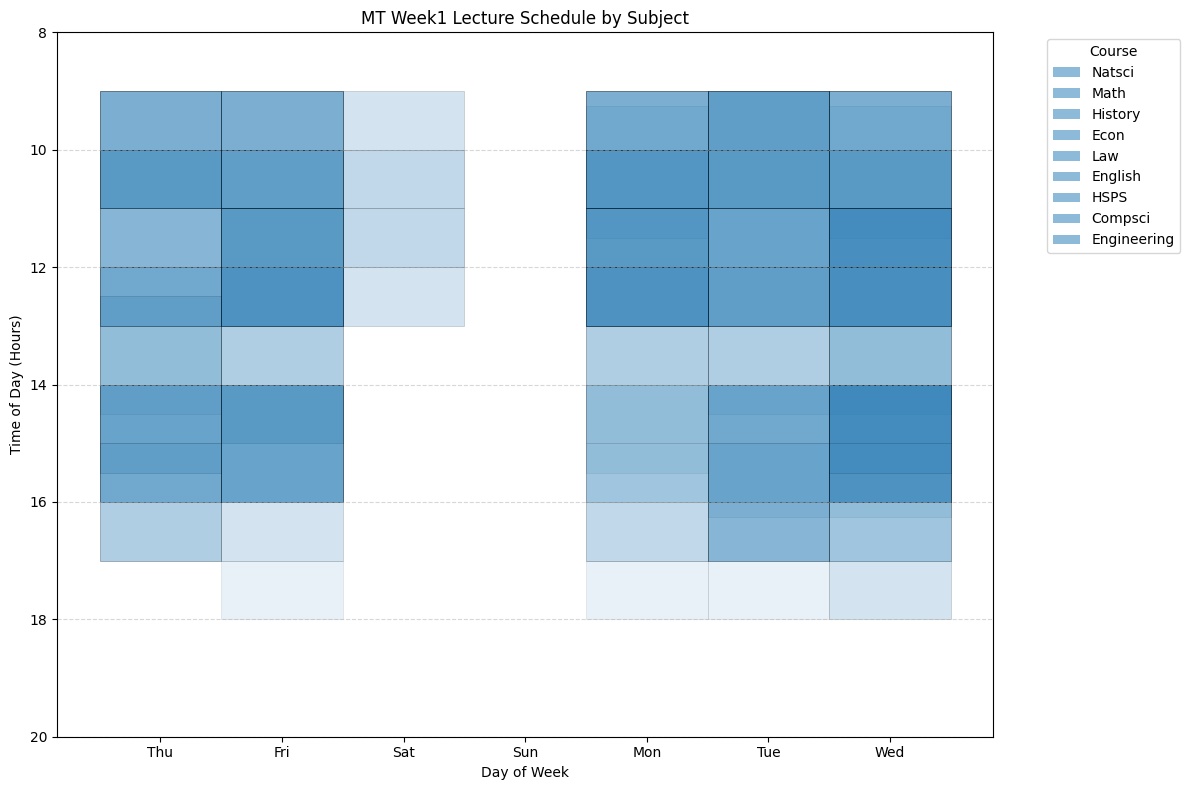

In [389]:
# Plot setup
fig, ax = plt.subplots(figsize=(12, 8))

# Colors for subjects
subjects = df['course'].unique()
colors = plt.cm.get_cmap('tab20', len(subjects))
color_map = {subject: colors(i) for i, subject in enumerate(subjects)}

# For each lecture, plot a horizontal bar at (day_num, start hour) with length (end-start)
for _, row in df_week.iterrows():
    day = row["day_shifted"]
    start = row['start_time']
    duration = row['end_time'] - start
    subject = row['course']
    
    # X: day as integer, Y: time interval as bar horizontal
    # We'll plot with Day on x-axis and time on y-axis rotated
    ax.broken_barh(
        [(day, 1)],  # span one day width on x-axis
        (start, duration),  # y position and height (time)
        # facecolors=color_map[subject],
        alpha=0.1,  # transparency
        edgecolor='k',
        linewidth=0.5
    )

# Set axes labels and ticks
ax.set_xlabel('Day of Week')
ax.set_ylabel('Time of Day (Hours)')

# X ticks as days
ax.set_xticks(np.arange(7) + 0.5)
ax.set_xticklabels(['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'])

# Y limits: 11 AM to 6 PM
ax.set_ylim(8, 20)
ax.invert_yaxis()  # optional: to have earlier times at top

# Add grid lines for better readability
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Add legend
# handles = [plt.Rectangle((0,0),1,1, color=color_map[subj], alpha=0.5) for subj in subjects]
# ax.legend(handles, subjects, title='Course', bbox_to_anchor=(1.05, 1), loc='upper left')
handles = [plt.Rectangle((0,0),1,1, alpha=0.5) for subj in subjects]
ax.legend(handles, subjects, title='Course', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('MT Week1 Lecture Schedule by Subject')
plt.tight_layout()
plt.show()

/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:9: SettingWithCopyWarning: 
A value is trying

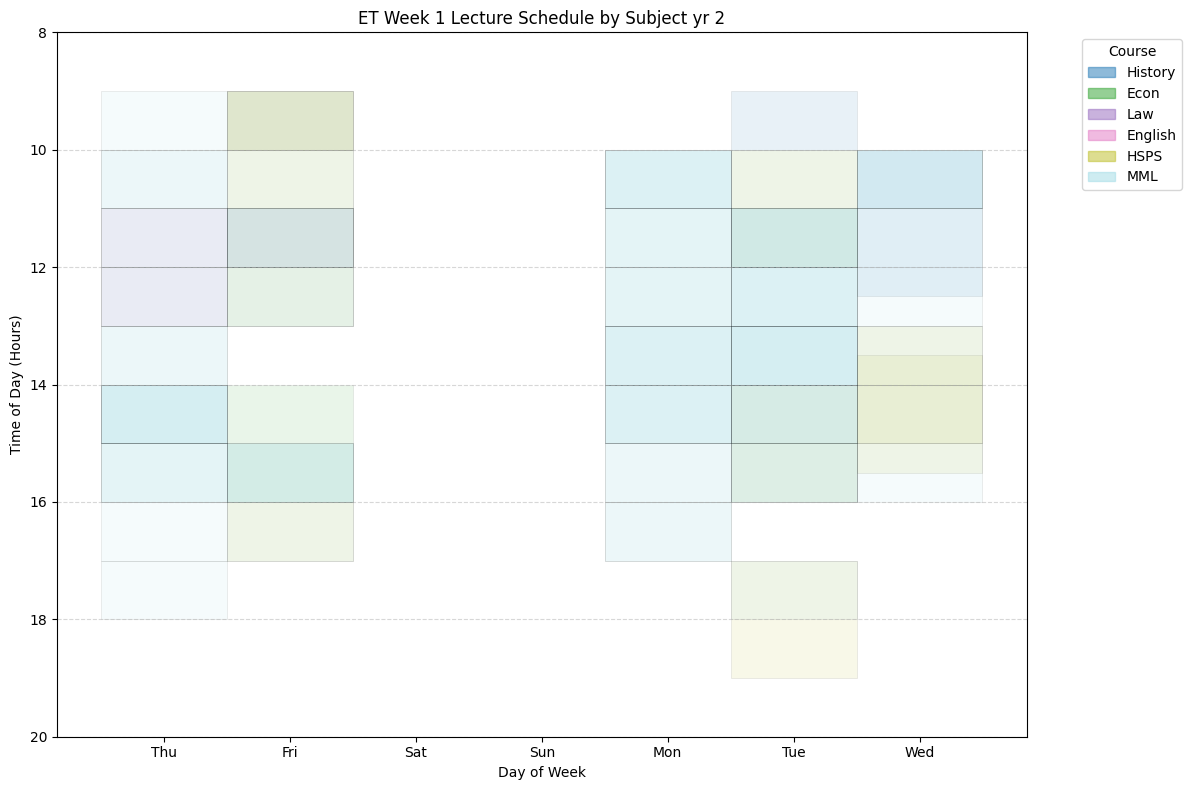

/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:9: SettingWithCopyWarning: 
A value is trying

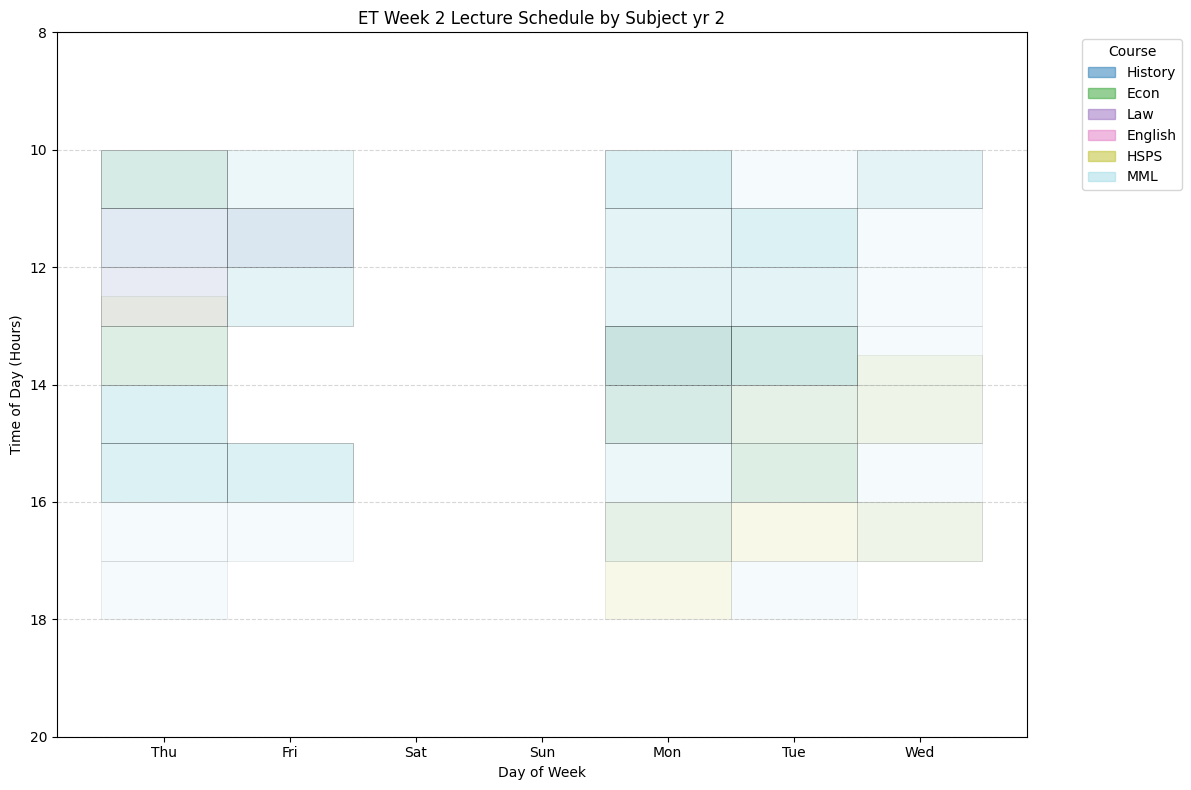

/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:9: SettingWithCopyWarning: 
A value is trying

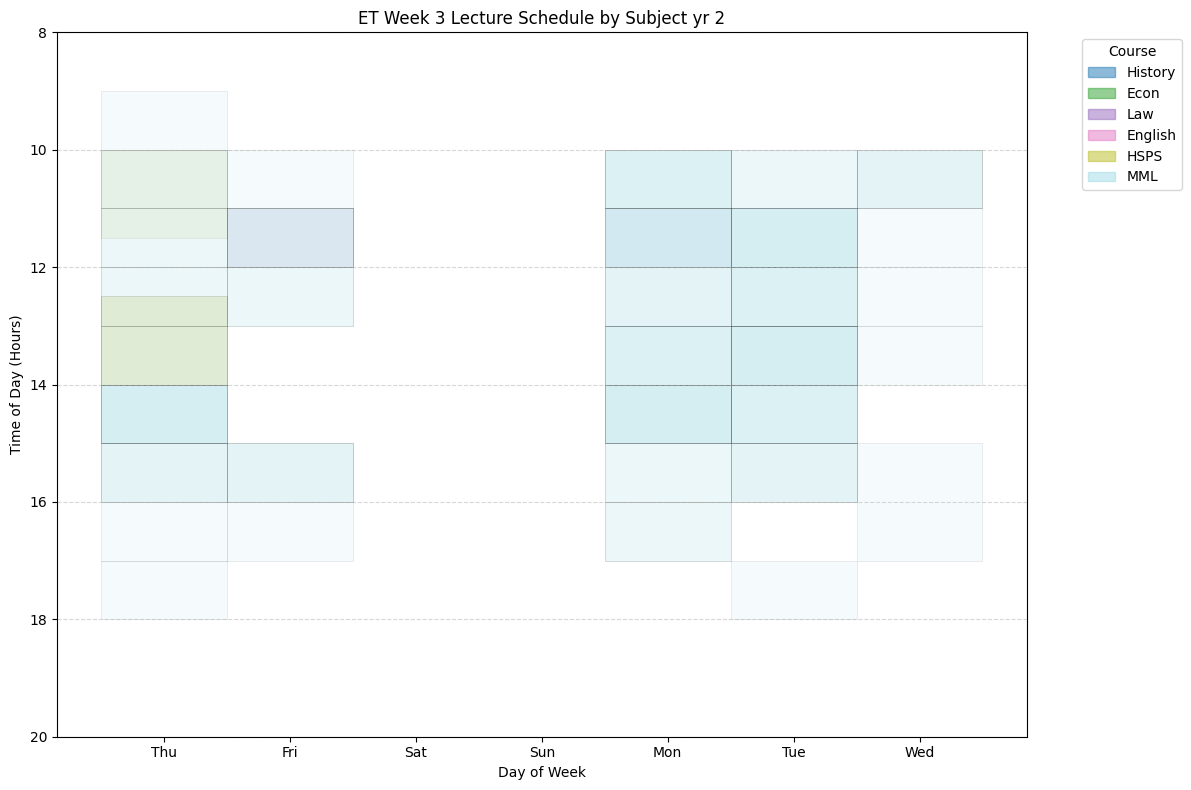

/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:9: SettingWithCopyWarning: 
A value is trying

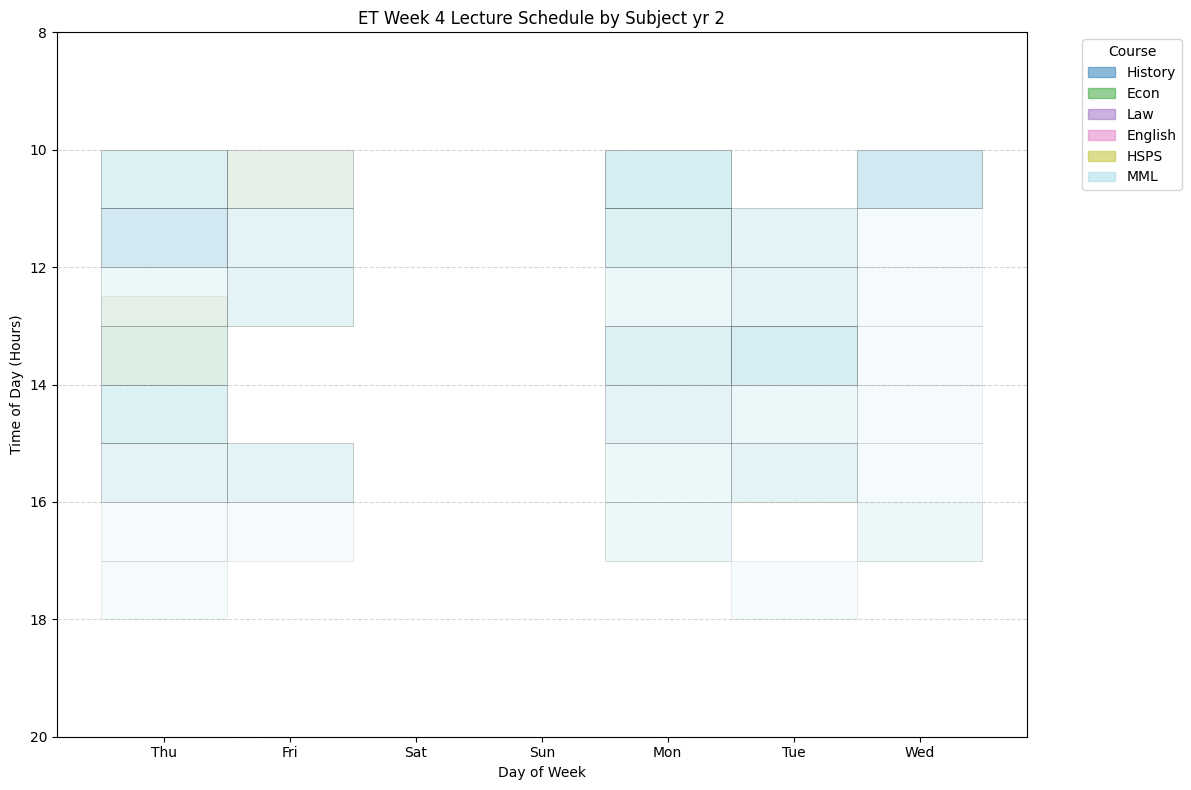

/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:9: SettingWithCopyWarning: 
A value is trying

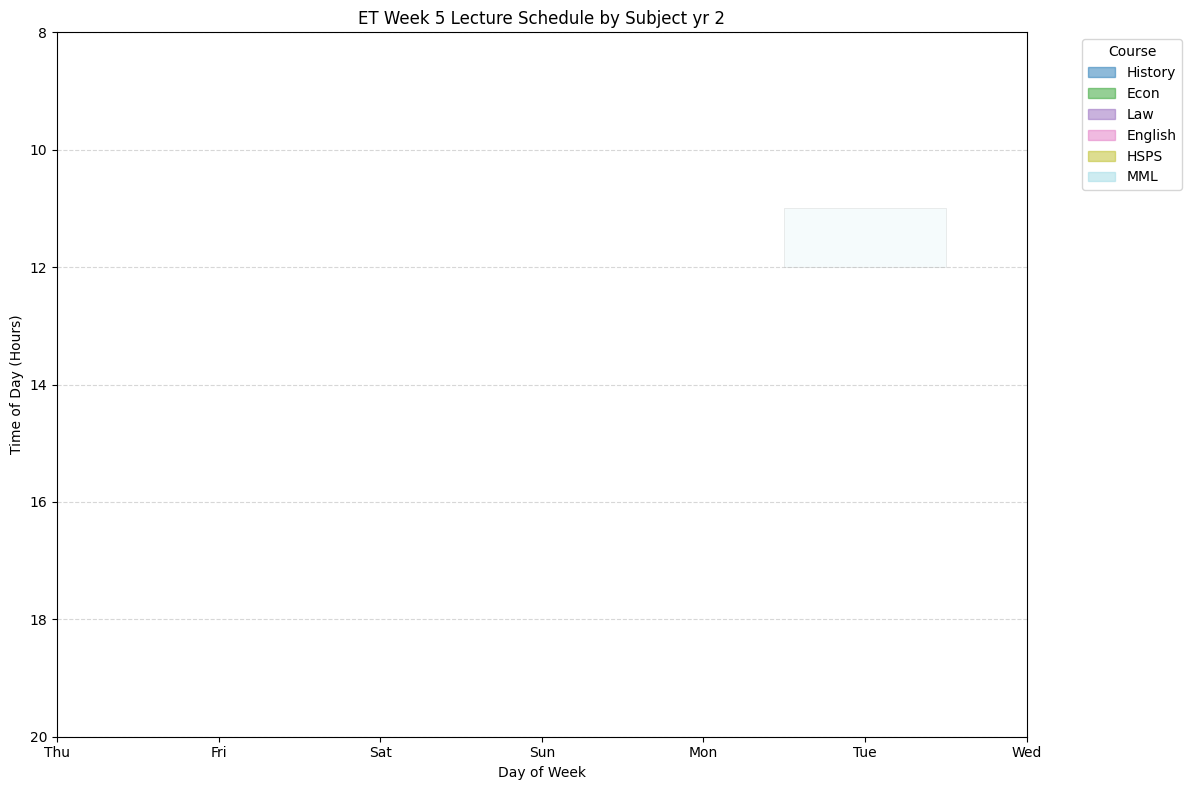

/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:9: SettingWithCopyWarning: 
A value is trying

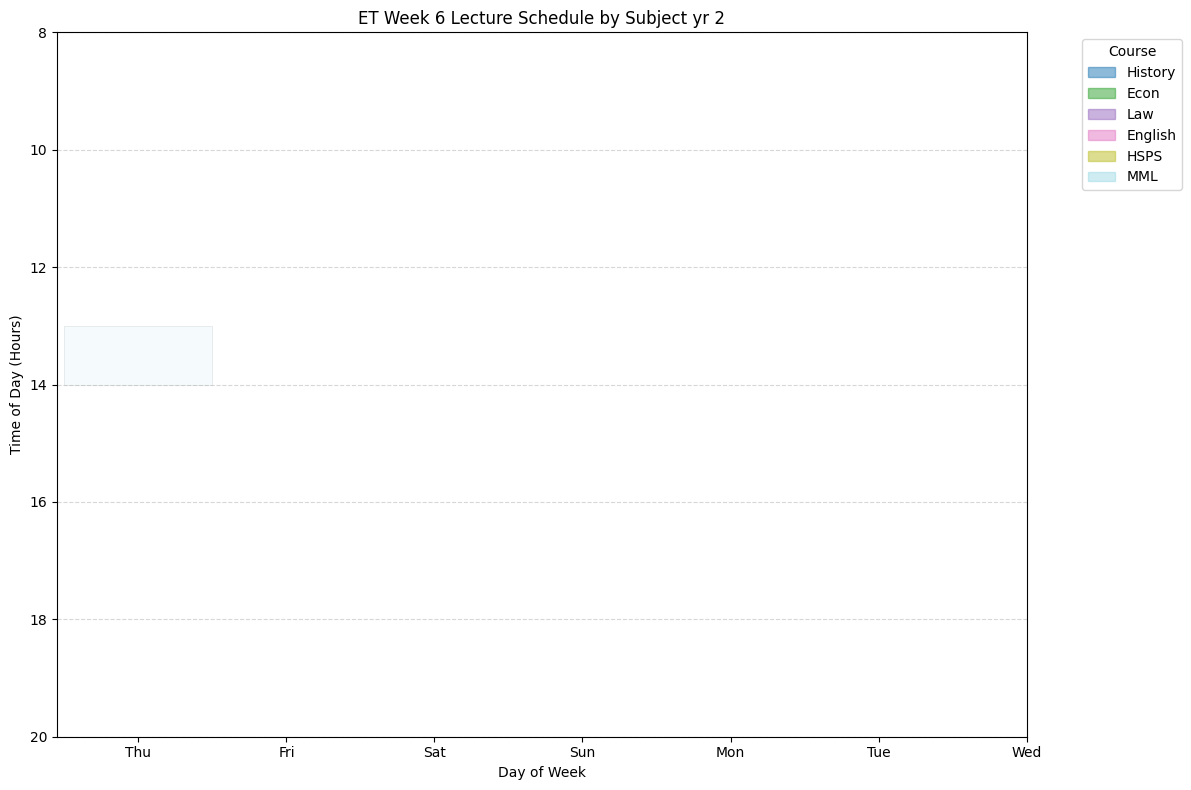

/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:9: SettingWithCopyWarning: 
A value is trying

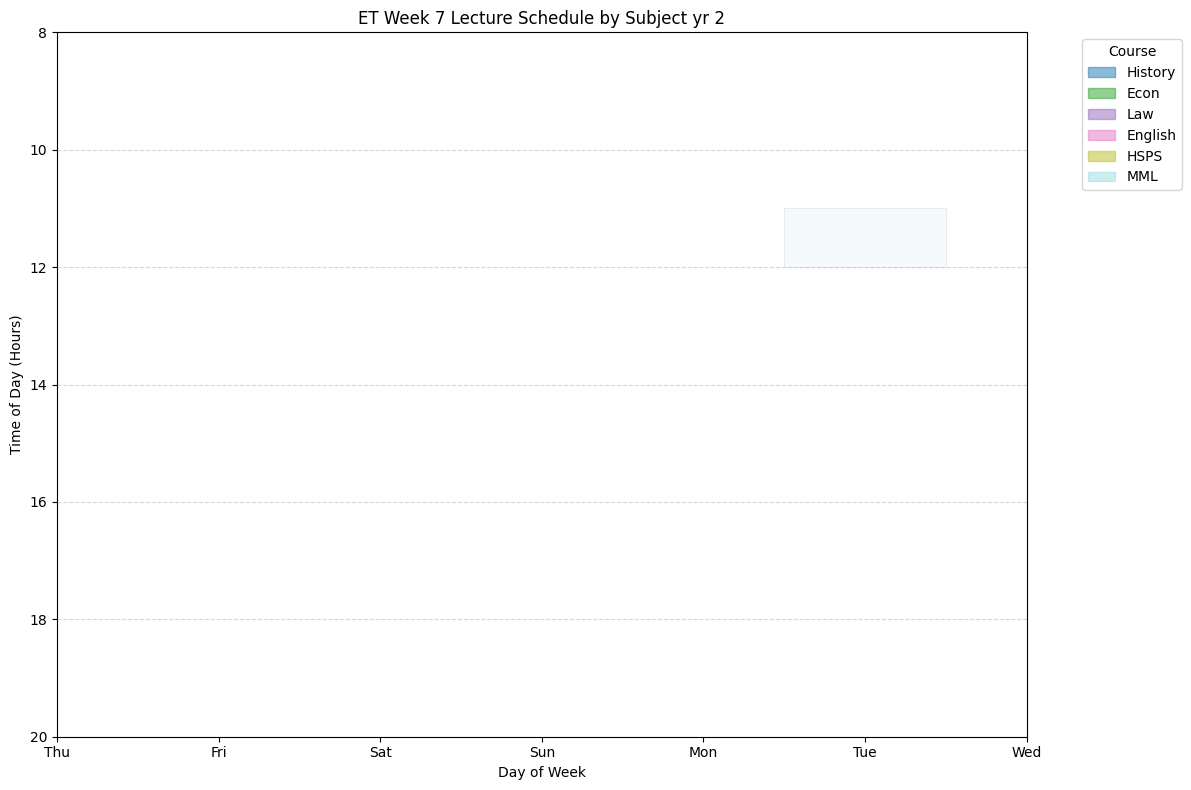

/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
/var/folders/d2/lttv844x6rq2dtt5p77brg7h0000gn/T/ipykernel_17230/1165583047.py:9: SettingWithCopyWarning: 
A value is trying

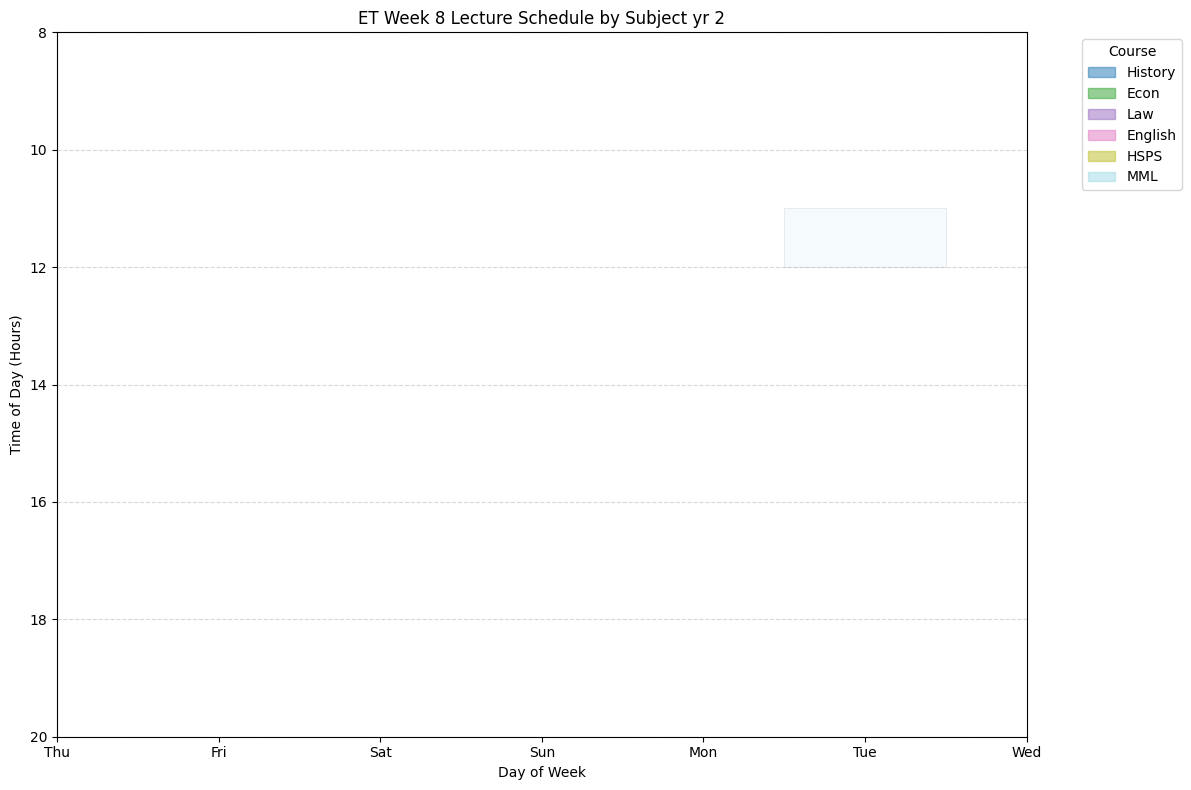

In [741]:
# Select one week (you can adjust these dates)

for i in range(0,8):
    start_week = pd.to_datetime(east_term[i])  # Thursday
    end_week = start_week + pd.Timedelta(days=6)
    df_week = df[(df['date'] >= start_week) & (df['date'] <= end_week)]
    df_week['start_time'] = df.loc[:,'start_time'].apply(time_to_hours)
    df_week['end_time'] = df.loc[:,'end_time'].apply(time_to_hours)
    df_week['day_num'] = df['date'].dt.dayofweek
    df_week["day_shifted"] = (df_week.loc[:,'day_num']-3)%7 #since cambridge weeks start on thurs, we want thurs = 0
    # Plot setup
    fig, ax = plt.subplots(figsize=(12, 8))

    # Colors for subjects
    subjects = df['course'].unique()
    colors = plt.cm.get_cmap('tab20', len(subjects))
    color_map = {subject: colors(i) for i, subject in enumerate(subjects)}

    # For each lecture, plot a horizontal bar at (day_num, start hour) with length (end-start)
    for _, row in df_week.iterrows():
        day = row["day_shifted"]
        start = row['start_time']
        duration = row['end_time'] - start
        subject = row['course']
        
        # X: day as integer, Y: time interval as bar horizontal
        # We'll plot with Day on x-axis and time on y-axis rotated
        ax.broken_barh(
            [(day, 1)],  # span one day width on x-axis
            (start, duration),  # y position and height (time)
            facecolors=color_map[subject],
            alpha=0.1,  # transparency
            # alpha=find_percent(row['course']),
            edgecolor='k',
            linewidth=0.5
        )

    # Set axes labels and ticks
    ax.set_xlabel('Day of Week')
    ax.set_ylabel('Time of Day (Hours)')

    # X ticks as days
    ax.set_xticks(np.arange(7) + 0.5)
    ax.set_xticklabels(['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'])

    # Y limits: 11 AM to 6 PM
    ax.set_ylim(8, 20)
    ax.invert_yaxis()  # optional: to have earlier times at top

    # Add grid lines for better readability
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)

    # Add legend
    handles = [plt.Rectangle((0,0),1,1, color=color_map[subj], alpha=0.5) for subj in subjects]
    ax.legend(handles, subjects, title='Course', bbox_to_anchor=(1.05, 1), loc='upper left')
 
    plt.title('ET Week ' + str(i+1) + ' Lecture Schedule by Subject yr 2')
    plt.tight_layout()
    plt.show()